<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/project%207%20B0007%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [366]:
%matplotlib inline
!pip show tensorflow
!wget -cq https://ti.arc.nasa.gov/c/5 -O naza.zip
!unzip -qqo naza.zip -d battery_data

Name: tensorflow
Version: 2.8.2+zzzcolab20220527125636
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: setuptools, tensorboard, numpy, typing-extensions, wrapt, six, astunparse, tensorflow-io-gcs-filesystem, grpcio, h5py, keras, protobuf, termcolor, tensorflow-estimator, keras-preprocessing, absl-py, flatbuffers, libclang, gast, opt-einsum, google-pasta
Required-by: kapre
[naza.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of naza.zip or
        naza.zip.zip, and cannot find naza.zip.ZIP, period.


In [367]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
def load_data(battery):
  mat = loadmat('/content/data/' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]
dataset, capacity = load_data('B0007')
pd.set_option('display.max_columns', 10)
print(dataset.head())
dataset.describe()


Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.89105229539079, 4.199359521791473, -0.0018658918833680202, 23.93704394613529, -0.0004, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.891052          4.199360   
1      1                   24 2008-04-02 15:25:41  1.891052          4.199497   
2      1                   24 2008-04-02 15:25:41  1.891052          3.985606   
3      1                   24 2008-04-02 15:25:41  1.891052          3.963247   
4      1                   24 2008-04-02 15:25:41  1.891052          3.946647   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.001866             23.937044       -0.0004         0.000   0.000  
1         -0.002139             23.924074       -0.0004         4.215  16.781  
2         -1.988778             24.004257       -2.0000         3.003  35.703  
3         -1.99

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.632911,3.516153,-1.910982,32.374078,1.471671,2.499169,1546.208924
std,45.699687,0.0,0.152751,0.268665,0.387120,4.004486,1.294697,0.550780,906.640295
min,1.000000,24.0,1.400455,1.737030,-2.006038,22.969923,-2.000000,0.000000,0.000000
25%,50.000000,24.0,1.497822,3.408859,-1.990432,29.683138,2.000000,2.470000,768.563000
50%,88.000000,24.0,1.605663,3.520359,-1.989406,32.294479,2.000000,2.582000,1537.031000
75%,127.000000,24.0,1.785885,3.681617,-1.988328,35.230784,2.000000,2.743000,2305.984000
max,168.000000,24.0,1.891052,4.233325,0.005072,42.332522,2.000000,4.249000,3690.234000


Text(0.5, 1.0, 'Discharge B0007')

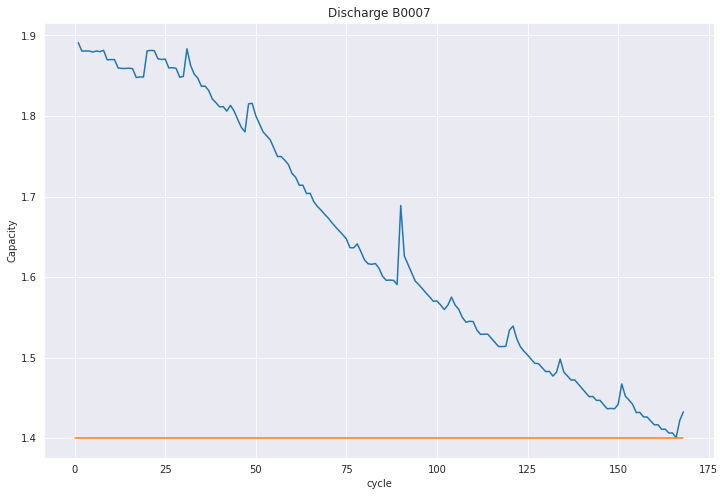

In [369]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0007')

In [370]:
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.891052  1.000000
1      2 2008-04-02 19:43:48  1.880637  0.994492
2      3 2008-04-03 00:01:06  1.880663  0.994506
3      4 2008-04-03 04:16:37  1.880771  0.994563
4      5 2008-04-03 08:33:25  1.879451  0.993865


Text(0.5, 1.0, 'Discharge B0007')

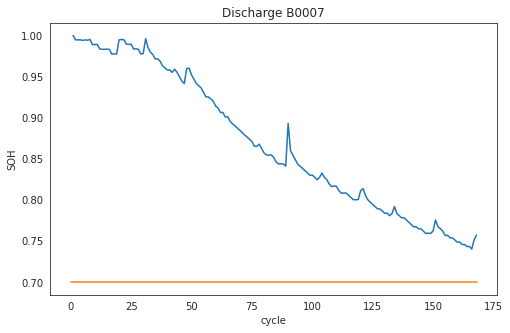

In [371]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0007')

In [372]:
C = dataset['capacity'][0]
soh = []
for i in range(len(dataset)):
  soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset = sc.fit_transform(train_dataset)
print(train_dataset.shape)
print(soh.shape)

(50285, 7)
(50285, 1)


In [373]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [374]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=train_dataset.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 8)                 64        
                                                                 
 dense_83 (Dense)            (None, 8)                 72        
                                                                 
 dense_84 (Dense)            (None, 8)                 72        
                                                                 
 dropout_88 (Dropout)        (None, 8)                 0         
                                                                 
 dense_85 (Dense)            (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [375]:
model.fit(x=train_dataset, y=soh.to_numpy(), batch_size=25, epochs=50)

Epoch 1/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.1164
Epoch 2/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.0218
Epoch 3/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.0211
Epoch 4/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.0207
Epoch 5/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.0204
Epoch 6/50
2012/2012 [==============================] - 3s 2ms/step - loss: 0.0205
Epoch 7/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.0202
Epoch 8/50
2012/2012 [==============================] - 3s 2ms/step - loss: 0.0203
Epoch 9/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.0203
Epoch 10/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.0202
Epoch 11/50
2012/2012 [==============================] - 4s 2ms/step - loss: 0.0201
Epoch 12/50
2012/2012 [==============================] - 3s 2ms/step - loss: 0.0201
E

In [376]:
dataset_val, capacity_val = load_data('B0007')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity']) / C
print(dataset_val.head(5))
print(dis_ele.head(5))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.89105229539079, 4.199359521791473, -0.0018658918833680202, 23.93704394613529, -0.0004, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.891052          4.199360   
1      1                   24 2008-04-02 15:25:41  1.891052          4.199497   
2      1                   24 2008-04-02 15:25:41  1.891052          3.985606   
3      1                   24 2008-04-02 15:25:41  1.891052          3.963247   
4      1                   24 2008-04-02 15:25:41  1.891052          3.946647   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.001866             23.937044       -0.0004         0.000   0.000  
1         -0.002139             23.924074       -0.0004         4.215  16.781  
2         -1.988778             24.004257       -2.0000         3.003  35.703  
3         -1.99

In [377]:
attrib=['capacity', 'voltage_measured', 'current_measured',
        'temperature_measured', 'current_load', 'voltage_load', 'time']
soh_pred = model.predict(sc.fit_transform(dataset_val[attrib]))
print(soh_pred.shape)

C = dataset_val['capacity'][0]
soh = []
for i in range(len(dataset_val)):
  soh.append(dataset_val['capacity'][i] / C)
new_soh = dataset_val.loc[(dataset_val['cycle'] >= 1), ['cycle']]
new_soh['SoH'] =  soh
new_soh['NewSoH'] = soh_pred
new_soh = new_soh.groupby(['cycle']).mean().reset_index()
print(new_soh.head(10))
rms = np.sqrt(mean_squared_error(new_soh['SoH'], new_soh['NewSoH']))
print('Root Mean Square Error: ', rms)

(50285, 1)
   cycle       SoH    NewSoH
0      1  1.000000  0.986254
1      2  0.994492  0.981328
2      3  0.994506  0.981330
3      4  0.994563  0.981395
4      5  0.993865  0.980783
5      6  0.994526  0.981412
6      7  0.994121  0.981032
7      8  0.994953  0.981763
8      9  0.988704  0.976124
9     10  0.988895  0.976284
Root Mean Square Error:  0.009823713736157412


Text(0.5, 1.0, 'Discharge B0007')

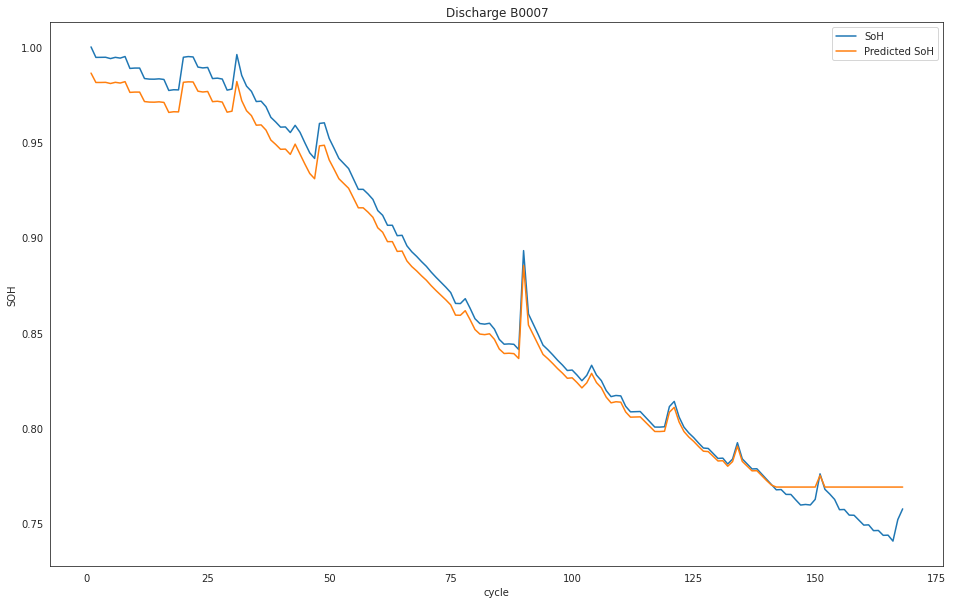

In [378]:
plot_df = new_soh.loc[(new_soh['cycle']>=1),['cycle','SoH', 'NewSoH']]
sns.set_style("white")
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['SoH'], label='SoH')
plt.plot(plot_df['cycle'], plot_df['NewSoH'], label='Predicted SoH')
#Draw threshold
#plt.plot([0.,len(capacity)], [0.70, 0.70], label='Threshold')
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0007')

In [379]:
dataset_val, capacity_val = load_data('B0007')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
rows=['cycle','capacity']
dataset=dis_ele[rows]
data_train=dataset[(dataset['cycle']<50)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test=data_test.iloc[:,1:2].values

sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.89105229539079, 4.199359521791473, -0.0018658918833680202, 23.93704394613529, -0.0004, 0.0, 0.0]


In [380]:
regress = Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200))
regress.add(Dropout(0.3))
regress.add(Dense(units=1))
regress.compile(optimizer='adam',loss='mean_squared_error')
regress.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 10, 200)           161600    
                                                                 
 dropout_89 (Dropout)        (None, 10, 200)           0         
                                                                 
 lstm_73 (LSTM)              (None, 10, 200)           320800    
                                                                 
 dropout_90 (Dropout)        (None, 10, 200)           0         
                                                                 
 lstm_74 (LSTM)              (None, 10, 200)           320800    
                                                                 
 dropout_91 (Dropout)        (None, 10, 200)           0         
                                                                 
 lstm_75 (LSTM)              (None, 200)             

In [381]:
regress.fit(X_train,y_train,epochs=200,batch_size=25)

Epoch 1/200
2/2 [==============================] - 9s 122ms/step - loss: 0.3404
Epoch 2/200
2/2 [==============================] - 0s 116ms/step - loss: 0.1096
Epoch 3/200
2/2 [==============================] - 0s 105ms/step - loss: 0.2111
Epoch 4/200
2/2 [==============================] - 0s 106ms/step - loss: 0.0620
Epoch 5/200
2/2 [==============================] - 0s 105ms/step - loss: 0.1119
Epoch 6/200
2/2 [==============================] - 0s 108ms/step - loss: 0.1113
Epoch 7/200
2/2 [==============================] - 0s 104ms/step - loss: 0.0765
Epoch 8/200
2/2 [==============================] - 0s 113ms/step - loss: 0.0466
Epoch 9/200
2/2 [==============================] - 0s 116ms/step - loss: 0.0506
Epoch 10/200
2/2 [==============================] - 0s 101ms/step - loss: 0.0734
Epoch 11/200
2/2 [==============================] - 0s 100ms/step - loss: 0.0454
Epoch 12/200
2/2 [==============================] - 0s 107ms/step - loss: 0.0479
Epoch 13/200
2/2 [===================

In [382]:
print(len(data_test))
data_total=pd.concat((data_train['capacity'], data_test['capacity']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

119


In [383]:
X_test=[]
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regress.predict(X_test)
print(pred.shape)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)
metrics.r2_score(tests,pred)

(119, 1)
Test RMSE: 0.034


0.8964387380690796

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Discharge B0007 (prediction) start in cycle 50 -RULe=-8, window-size=10')

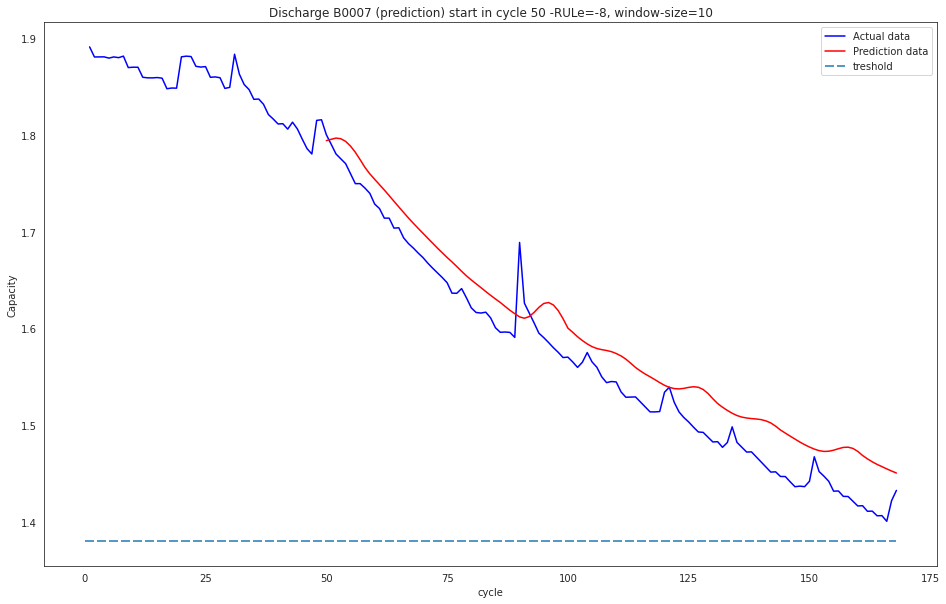

In [384]:

ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0007 (prediction) start in cycle 50 -RULe=-8, window-size=10')

In [386]:
pred=0
Afil=0
Pfil=0
a=data_test['capacity'].values
b=data_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil+ln))
print("The prediction fail at cycle number: "+ str(Pfil+ln))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 49
The prediction fail at cycle number: 49
The error of RUL= 0 Cycle(s)
